In [10]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [40]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [43]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [44]:
data.drop('CustomerID',axis=1,inplace=True)


In [45]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [46]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [8]:
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

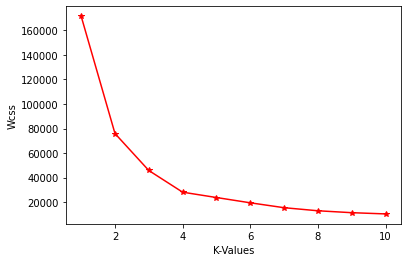

In [15]:
X1=data.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='red',marker='*')
plt.xlabel('K-Values')
plt.ylabel('Wcss')
plt.show()


In [16]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)


[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [17]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


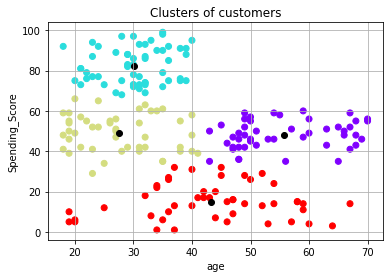

In [20]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.grid()
plt.xlabel('age')
plt.ylabel('Spending_Score')
plt.title('Clusters of customers')
plt.show()

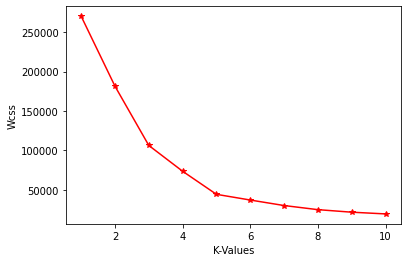

In [26]:
X2=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='red',marker='*')
plt.xlabel('K-Values')
plt.ylabel('Wcss')
plt.show()


In [23]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)


[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [24]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


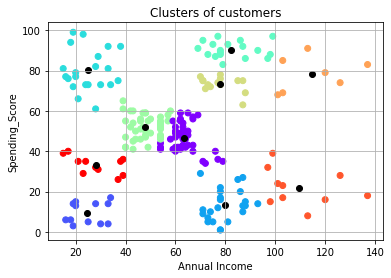

In [28]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending_Score')
plt.title('Clusters of customers')
plt.show()

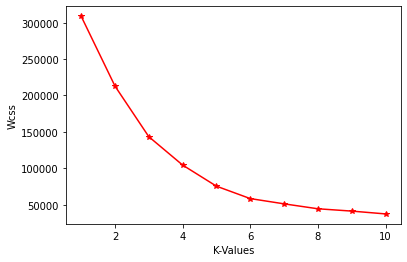

In [47]:
X_final=data.loc[:]
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_final)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='red',marker='*')
plt.xlabel('K-Values')
plt.ylabel('Wcss')
plt.show()


In [48]:
kmeans=KMeans(n_clusters=6)
label=kmeans.fit_predict(X_final)
print(label)


[2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 5 2 5 4 5 4 0 2 5 4 0 0 0 4 0 0 4 4 4 4 4 0 4 4 0 4 4 4 0 4 4 0 0 4 4 4 4
 4 0 4 0 0 4 4 0 4 4 0 4 4 0 0 4 4 0 4 0 0 0 4 0 4 0 0 4 4 0 4 0 4 4 4 4 4
 0 0 0 0 0 4 4 4 4 0 0 0 3 0 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [49]:
print(kmeans.cluster_centers_)

[[ 0.34210526 27.         56.65789474 49.13157895]
 [ 0.57142857 41.68571429 88.22857143 17.28571429]
 [ 0.38095238 44.14285714 25.14285714 19.52380952]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.44444444 56.15555556 53.37777778 49.08888889]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]]


In [51]:
clusters=kmeans.fit_predict(X_final)
data['label']=clusters

In [52]:
from mpl_toolkits.mplot3d import Axes3D

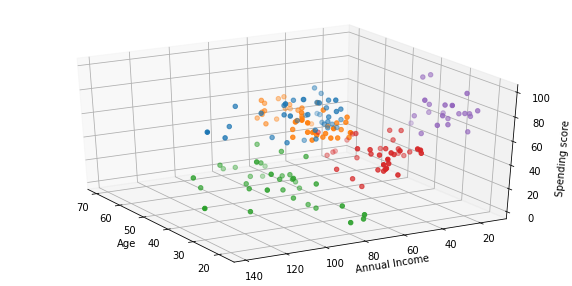

In [57]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data.Age[data.label==0],data['Annual Income (k$)'][data.label==0],data['Spending Score (1-100)'][data.label==0 ])
ax.scatter(data.Age[data.label==1],data['Annual Income (k$)'][data.label==1],data['Spending Score (1-100)'][data.label==1 ])
ax.scatter(data.Age[data.label==2],data['Annual Income (k$)'][data.label==2],data['Spending Score (1-100)'][data.label==2 ])
ax.scatter(data.Age[data.label==3],data['Annual Income (k$)'][data.label==3],data['Spending Score (1-100)'][data.label==3 ])
ax.scatter(data.Age[data.label==4],data['Annual Income (k$)'][data.label==4],data['Spending Score (1-100)'][data.label==4 ])
ax.view_init(30,150)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel("Spending score ")
plt.show()

